In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime as DT
import statistics

import os
import time
import xlwt
from xlwt.Workbook import *
from pandas import ExcelWriter
import xlsxwriter
import matplotlib.ticker as mtick
import datetime
from docx import Document
from docx.shared import Inches
from docx.shared import Cm
from docx.shared import Pt
from docx.shared import RGBColor
from docx.enum.text import WD_ALIGN_PARAGRAPH
from os import walk

Insert Table

In [3]:
def insert_table(df_table,word_size,width=10):
        global table_number
        # get table data -------------nametable
        x=df_table.shape[0]+1
        y=df_table.shape[1]
        table = document.add_table(x,y)
        table.style = 'TableGrid'
        
        for i in range(x):
            for j in range(y):
                if i==0:
                    table.rows[i].cells[j].text=str(df_table.columns[j])
                else:
                    table.rows[i].cells[j].text=str(df_table.iloc[i-1,j])
                #table.rows[i].cells[j].width = Inches(0.5)

                
        for row in table.rows:
            for cell in row.cells:
                paragraphs = cell.paragraphs
                for paragraph in paragraphs:
                    for run in paragraph.runs:
                        font = run.font
                        font.size= Pt(word_size)
                        cell.width = width

        p = document.add_paragraph()
        p.alignment = 1




# CLO

In [4]:
def Calculate_ClO(data):

    CLO=data.loc[:,data.columns != 'PLO'].groupby("CLO").mean()
    CLO_Ave=CLO.apply(np.mean,1).apply(lambda x:round(x,2))
    CLO_Min=CLO.apply(min,1).apply(lambda x:round(x,2))
    CLO_Max=CLO.apply(max,1).apply(lambda x:"{:.2f}".format(x))
    CLO_SD=CLO.apply(np.std,1).apply(lambda x:round(x,2))
    CLO_Points=data.groupby("CLO")["CLO"].count().apply(lambda x:"{:.0f}".format(x))
    CLO_70=CLO.loc[:,CLO.iloc[0,:].notna()].apply(lambda x:x>=0.7).apply(np.mean,1)
    CLO_A=CLO.apply(lambda x:x>=0.9).apply(sum,1)
    CLO_B=CLO.apply(lambda x:x>=0.8).apply(sum,1)-CLO_A
    CLO_C=CLO.apply(lambda x:x>=0.7).apply(sum,1)-CLO_B-CLO_A
    CLO_D=CLO.apply(lambda x:x>=0.6).apply(sum,1)-CLO_C-CLO_B-CLO_A
    CLO_F=CLO.apply(lambda x:x>=0).apply(sum,1)-CLO_D-CLO_C-CLO_B-CLO_A

    CLO["CLO_Ave"]=CLO_Ave
    CLO["CLO_SD"]=CLO_SD
    CLO["CLO_Min"]=CLO_Min
    CLO["CLO_Max"]=CLO_Max
    CLO["CLO_Points"]=CLO_Points
    CLO["CLO_70"]=CLO_70
    CLO["CLO_A"]=CLO_A
    CLO["CLO_B"]=CLO_B
    CLO["CLO_C"]=CLO_C
    CLO["CLO_D"]=CLO_D
    CLO["CLO_F"]=CLO_F
    CLO=CLO.transpose()

    return CLO

# PLO

In [5]:
def Calculate_PlO(data):
    PLO=data.loc[:,data.columns != 'CLO'].groupby("PLO").mean()
    PLO_Ave=PLO.apply(np.mean,1).apply(lambda x:round(x,2))
    PLO_Min=PLO.apply(min,1).apply(lambda x:round(x,2))
    PLO_Max=PLO.apply(max,1).apply(lambda x:"{:.2f}".format(x))
    PLO_SD=PLO.apply(np.std,1).apply(lambda x:round(x,2))
    PLO_Points=data.groupby("PLO")["PLO"].count().apply(lambda x:"{:.0f}".format(x))
    PLO_70=PLO.loc[:,PLO.iloc[0,:].notna()].apply(lambda x:x>=0.7).apply(np.mean,1)
    PLO_A=PLO.apply(lambda x:x>=0.9).apply(sum,1)
    PLO_B=PLO.apply(lambda x:x>=0.8).apply(sum,1)-PLO_A
    PLO_C=PLO.apply(lambda x:x>=0.7).apply(sum,1)-PLO_B-PLO_A
    PLO_D=PLO.apply(lambda x:x>=0.6).apply(sum,1)-PLO_C-PLO_B-PLO_A
    PLO_F=PLO.apply(lambda x:x>=0).apply(sum,1)-PLO_D-PLO_C-PLO_B-PLO_A

    PLO["PLO_Ave"]=PLO_Ave
    PLO["PLO_SD"]=PLO_SD
    PLO["PLO_Min"]=PLO_Min
    PLO["PLO_Max"]=PLO_Max
    PLO["PLO_Points"]=PLO_Points
    PLO["PLO_70"]=PLO_70
    PLO["PLO_A"]=PLO_A
    PLO["PLO_B"]=PLO_B
    PLO["PLO_C"]=PLO_C
    PLO["PLO_D"]=PLO_D
    PLO["PLO_F"]=PLO_F
    PLO=PLO.transpose()

    return PLO

Plot

In [6]:
def stack_plot(data,maxn):
    total_students=data.iloc[-5:,0].sum()
    A=list(data.iloc[-5,0:data.shape[1]+1]/total_students)
    B=list(data.iloc[-4,0:data.shape[1]+1]/total_students)
    C=list(data.iloc[-3,0:data.shape[1]+1]/total_students)
    D=list(data.iloc[-2,0:data.shape[1]+1]/total_students)
    F=list(data.iloc[-1,0:data.shape[1]+1]/total_students)
    ind=list(range(0,data.shape[1]))
    AB = np.add(A, B).tolist()
    ABC=np.add(AB, C).tolist()
    ABCD=np.add(ABC, D).tolist()
    fig=plt.figure(figsize=(5,4))
    ax = plt.subplot(111)

    p1=ax.bar(ind,A,label='$>0.9$')
    p2=ax.bar(ind,B,bottom=A,label="0.8~0.9" )
    p3=ax.bar(ind,C,bottom=AB,label='0.7~0.8')
    p4=ax.bar(ind,D,bottom=ABC,label='0.6~0.7')
    p5=ax.bar(ind,F,bottom=ABCD,label='<0.6')

    #ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    vals = ax.get_yticks()
    ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
    ax.set_ylabel("Number of students(%)")
    ax.set_xticks(range(data.shape[1]))
    ax.set_xticklabels(list(data.columns))
   
    box = ax.get_position()
    if "CLO_Min" in data.index:
        ax.set_xlabel('Course Learning Outcomes',fontsize=14)
        ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
        ax.set_xlim(-0.5,maxn-0.5)
    elif data.shape[1]>5:
        ax.set_xlabel('Programe Learning Outcomes',fontsize=14)
        ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
        ax.legend(loc='center left',bbox_to_anchor=(1.05, 0.5), borderaxespad=0.)
        ax.set_xlim(-0.5,maxn-0.5)
    else:
        ax.set_xlabel('Programe Learning Outcomes',fontsize=14)
        ax.set_position([box.x0, box.y0, box.width*0.8, box.height])
        ax.legend(loc='center left',bbox_to_anchor=(0.6, 0.5), borderaxespad=0.)
        ax.set_xlim(-0.5,maxn-0.5)
    fig.savefig(path+"Plot.png", bbox_inches='tight')
    plt.show()



#Split

In [7]:
def Split_CLOPLO(data,CLOPLO):
    #total.reset_index(drop=True,inplace=True)
    CLO=[]
    nanlabel=[]
    data[CLOPLO]=data[CLOPLO].apply(str)
    
    for i in range(data.shape[0]):
        
        if data[CLOPLO].iloc[i]=="nan":
            nanlabel.append(i)
        if "," in str(data[CLOPLO].iloc[i]):
            
            CLO=data[CLOPLO].iloc[i].split(",")
            data.loc[i,CLOPLO]=CLO[0].strip()


            for j in range(1,len(CLO)):
                if CLO[-1]==' ' or CLO[-1]=='':
                    continue
                data=data.append(data.iloc[i,:],ignore_index=True)
                data.loc[len(data)-1,CLOPLO]=CLO[j].strip()
    data.drop(labels=nanlabel,axis=0,inplace=True)
    return data

    25289  25293  25294  25295  25296  25298  25299  25300  25301  25302  ...  \
0    1.00   1.00   1.00   1.00   1.00    1.0   1.00   1.00   1.00   1.00  ...   
1    1.00   1.00   1.00   1.00   1.00    1.0   1.00   1.00   1.00   1.00  ...   
2    1.00   1.00   1.00   1.00   1.00    1.0   1.00   1.00   1.00   1.00  ...   
3    1.00   1.00   1.00   1.00   1.00    1.0   1.00   1.00   1.00   1.00  ...   
4    1.00   1.00   1.00   1.00   1.00    1.0   1.00   1.00   1.00   1.00  ...   
5    1.00   1.00   1.00   0.00   0.00    1.0   0.00   1.00   1.00   0.00  ...   
6    0.00   1.00   0.00   1.00   1.00    0.0   1.00   1.00   1.00   0.00  ...   
7    1.00   1.00   0.00   1.00   1.00    1.0   1.00   1.00   0.00   1.00  ...   
8    0.50   0.75   1.00   0.75   0.75    1.0   1.00   1.00   1.00   0.50  ...   
9    1.00   1.00   1.00   0.00   1.00    1.0   1.00   1.00   1.00   1.00  ...   
10   1.00   1.00   1.00   1.00   1.00    1.0   1.00   1.00   1.00   1.00  ...   
11   0.00   1.00   1.00   1.

    25289  25293  25294  25295  25296  25298  25299  25300  25301  25302  ...  \
0       1      1      1      1      1      1      1      1      1      1  ...   
1       1      1      1      1      1      1      1      1      1      1  ...   
2       1      1      1      1      1      1      1      1      1      1  ...   
3       1      1      1      1      1      1      1      1      1      1  ...   
4       1      1      1      1      1      1      1      1      1      1  ...   
5       1      1      1      1      1      1      1      1      1      1  ...   
6       1      1      1      1      1      1      1      1      1      1  ...   
7       1      1      1      1      1      1      1      1      1      1  ...   
8       1      1      1      1      1      1      1      1      1      1  ...   
9       1      1      1      1      1      1      1      1      1      1  ...   
10      1      1      1      1      1      1      1      1      1      1  ...   
11      1      1      1     

C:\ProgramData\Anaconda3\lib\site-packages\docx\styles\styles.py:139: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  return self._get_style_id_from_style(self[style_name], style_type)


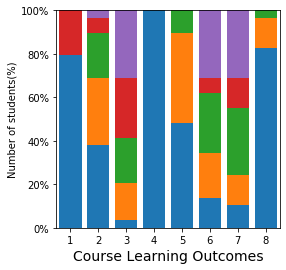

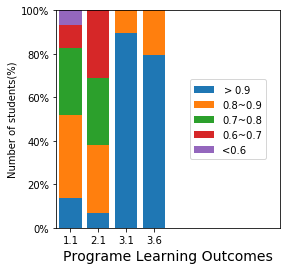

In [12]:
#CS 712 Assessment Data_Class of 2023 "Midterm Exam","Final Exam","DI Assignment I","DI Assignment II","Drug Card Project"
#"Exam1","Exam2","Exam3"
#CS 732 Assessment Data Collection_Class of 2022_YSH.xlsx "Midterm Exam","Final Exam","Concept map","Educational tool"
#"Midterm Exam","Final Exam","OSCE","Group Home Device Presentation","SOAP 1-4, 6-8"
#"Exam1","Exam2","Exam3","Group SOAP","Individual SOAP","Journal Club","Point-of-Care"
#"Midterm Exam","Final Exam","OSCE","Group Home Device Presentation","SOAP 1-4, 6-8"

sheetlist=["Midterm Exam","Final Exam","DI Assignment I","DI Assignment II", "Drug Card Project"]
course_name="CS 712 Assessment Data_Class of 2023_Updated.xlsx"


path="C:\\Users\\Sli\\downloads\\"
wb= Workbook()
ws =wb.add_sheet("Summary")
menu=pd.DataFrame(columns=["Exam","Points","Weight"])
writer = pd.ExcelWriter(path+"Final_"+course_name, engine='openpyxl') 
document = Document()
for i in range(len(sheetlist)):
    data=pd.read_excel(path+course_name,index_col=False,header=None,sheet_name=sheetlist[i])
    data.rename(columns={0:"name"},inplace=True)
    data.set_index("name",inplace=True)    
    
    if "Answer" in list(data.index):
        for row in range(3,data.shape[0]):
            for col in range(0,data.shape[1]):
                if type(data.iloc[row,col]) == float:
                    continue
                else:
                    data.iloc[row,col]=float(data.iloc[row,col]==data.loc["Answer"].iloc[col])
        data.drop(index="Answer",inplace=True)

    if i==0:
        total=data
    else:
        total=pd.merge(total,data,on="name",how='outer')

# process each exam        
    data=data.transpose()
    data.to_excel(path+"temp.xlsx",index=False)
    data=pd.read_excel(path+"temp.xlsx")
    
    dataCLO=Split_CLOPLO(data,"CLO")
    dataPLO=Split_CLOPLO(data,"PLO")

    print(dataPLO)
    dataCLO["CLO"]=dataCLO["CLO"].apply(lambda x: str(x))
    dataPLO["PLO",]=dataPLO["PLO"].apply(lambda x: str(x))
    CLO=Calculate_ClO(dataCLO)
    PLO=Calculate_PlO(dataPLO)
    summary=pd.concat([CLO.reset_index(drop=False),PLO.reset_index(drop=False)],axis=1, sort=False)
    ws =wb.add_sheet(sheetlist[i])
    summary.to_excel(writer,sheetlist[i],index=False)
    menu.loc[i,"Exam"]=sheetlist[i]
    menu.loc[i,"Points"]=data.shape[0]

    
total=total.transpose()
total.to_excel(path+"temp.xlsx",index=False)
total=pd.read_excel(path+"temp.xlsx")
totalCLO=Split_CLOPLO(total,"CLO")
totalPLO=Split_CLOPLO(total,"PLO")

#total summary
CLO=Calculate_ClO(totalCLO)
CLO_table=CLO.iloc[-11:-5,:].transpose()
CLO_table.columns=["AVE","SD","MIN","MAX","Points","%>70%"]
CLO_table["%>70%"]=CLO_table["%>70%"].apply(lambda x:"{:.0%}".format(x))

PLO=Calculate_PlO(totalPLO)
PLO_table=PLO.iloc[-11:-5,:].transpose()
PLO_table.columns=["AVE","SD","MIN","MAX","Points","%>70%"]
PLO_table["%>70%"]=PLO_table["%>70%"].apply(lambda x:"{:.0%}".format(x))

total_points=menu["Points"].sum()
menu["Weight"]=menu["Points"].apply(lambda x:"{:.0%}".format(x/total_points))

insert_table(menu,10,3)
insert_table(CLO_table.reset_index(drop=False),10,7)
insert_table(PLO_table.reset_index(drop=False),10,7)
summary=pd.concat([CLO.reset_index(drop=False),PLO.reset_index(drop=False)],axis=1, sort=False)
summary.to_excel(writer,"Summary")

maxn=max(CLO.shape[1],PLO.shape[1])
stack_plot(CLO,maxn)
document.add_picture(path+"Plot.png", width=Inches(6))


stack_plot(PLO,maxn)
document.add_picture(path+"Plot.png", width=Inches(6))
document.save(path+course_name.split(".")[0]+'.docx')

writer.save()
writer.close()